In [30]:
# =========================
# 1) EDA (Step 1) — Housing.csv
# =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Target
y = df["price"]

# --- Load ---
# (dosya yolunu kendine göre güncelle)
df = pd.read_csv("Datasets/Housing.csv")

# --- Quick look ---
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
display(df.head())

print("\nInfo:")
df.info()

print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False))

print("\nDescribe (numeric):")
display(df.describe())

Shape: (545, 13)

Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB

Missing values per column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad 

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


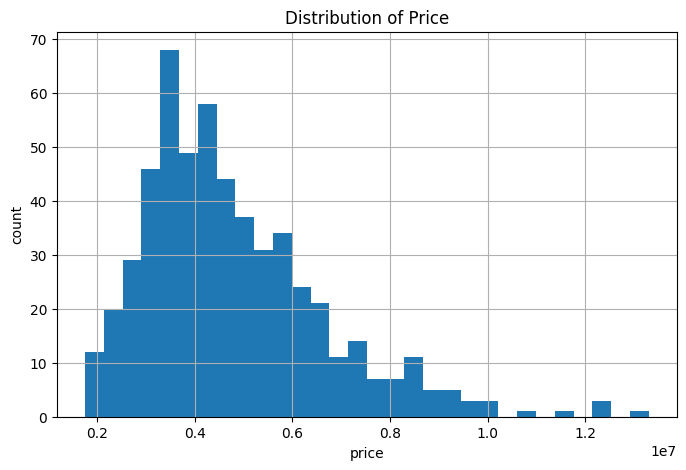

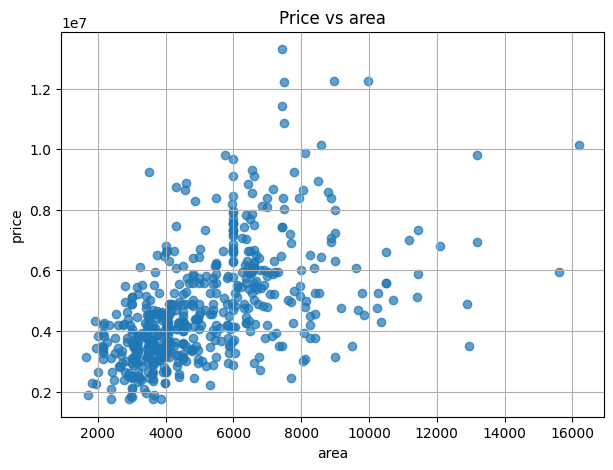

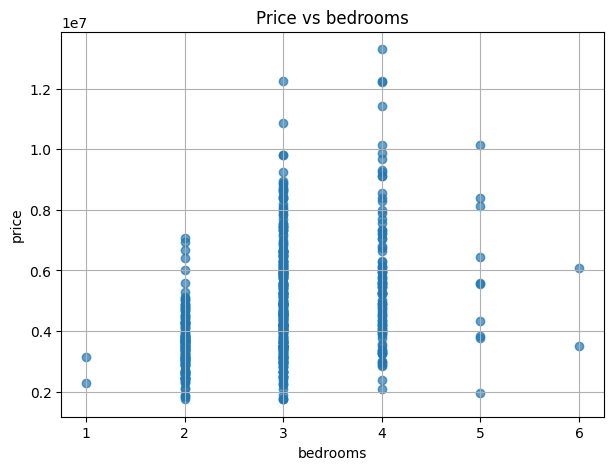

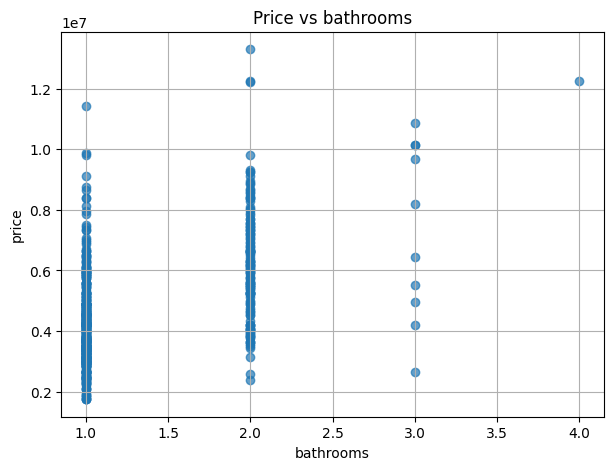

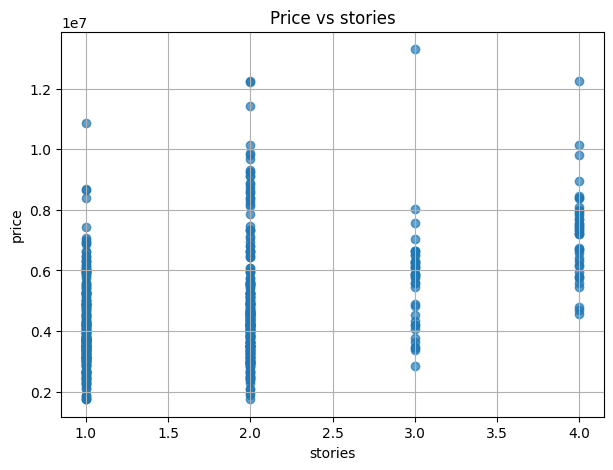

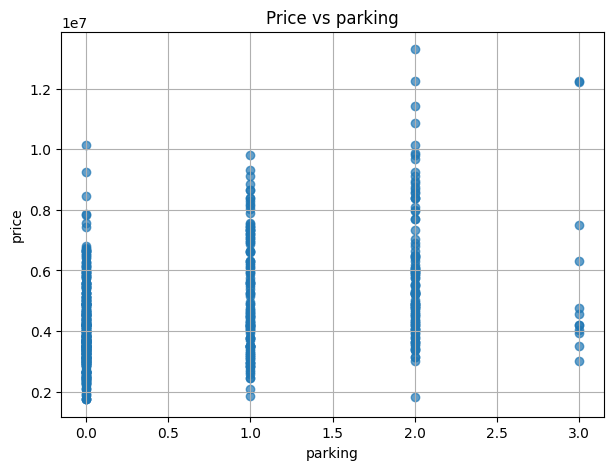


Correlation (numeric):


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


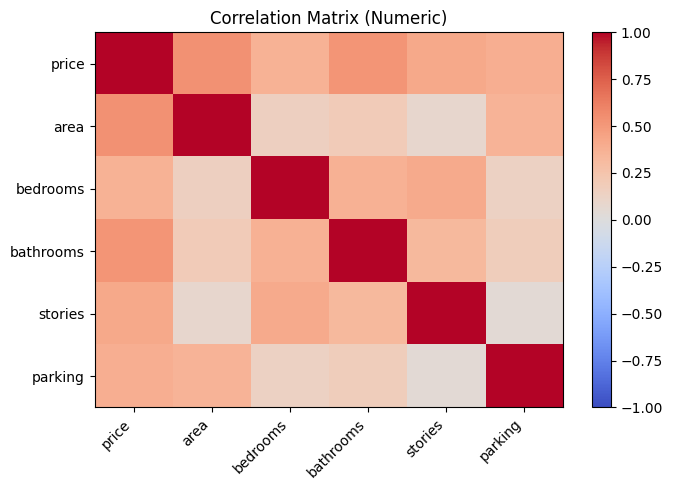

High correlation features with price (|corr| >= 0.50):


area         0.535997
bathrooms    0.517545
Name: price, dtype: float64

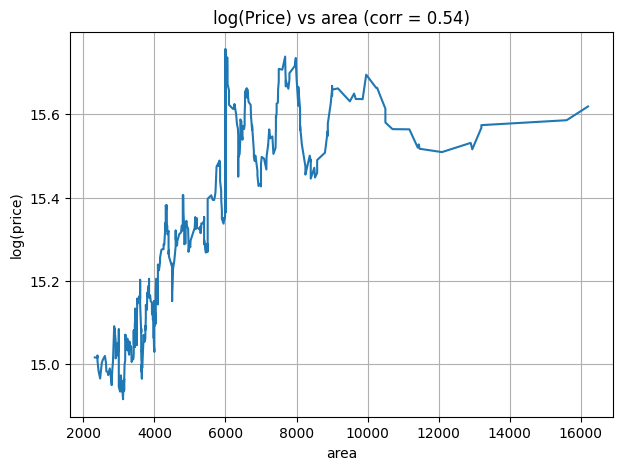

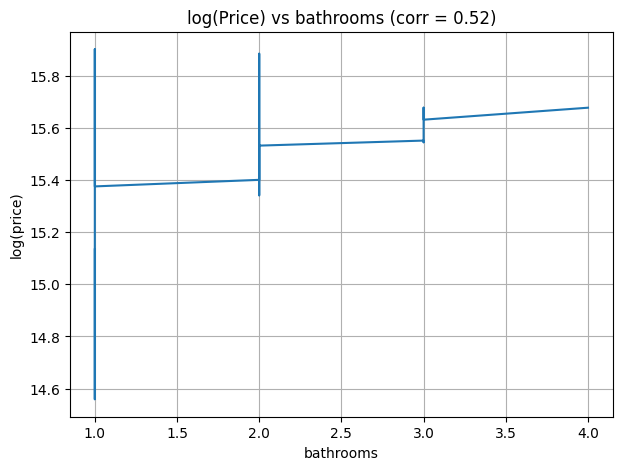

/var/folders/w5/s_933h6s7d1_47_p7bzlg8c80000gn/T/ipykernel_2685/2950906224.py:92: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels)


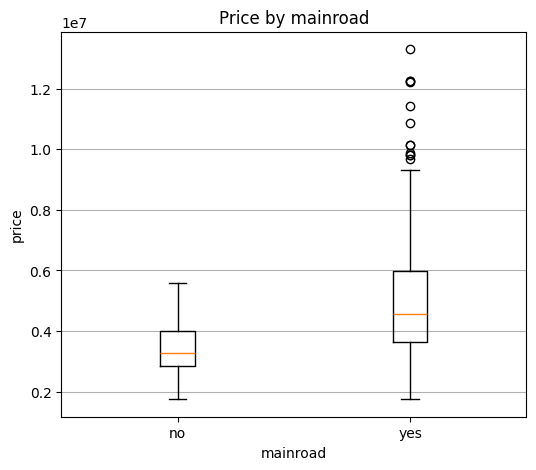

/var/folders/w5/s_933h6s7d1_47_p7bzlg8c80000gn/T/ipykernel_2685/2950906224.py:92: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels)


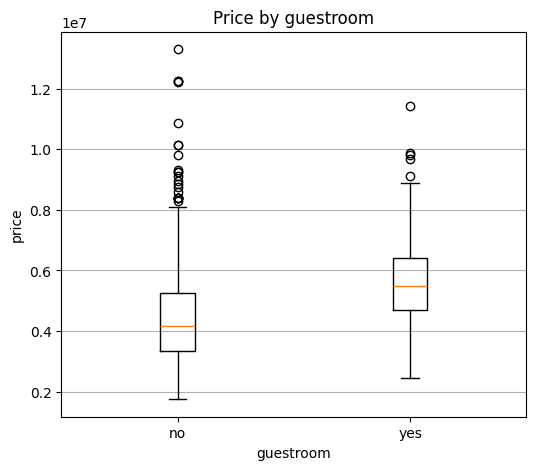

/var/folders/w5/s_933h6s7d1_47_p7bzlg8c80000gn/T/ipykernel_2685/2950906224.py:92: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels)


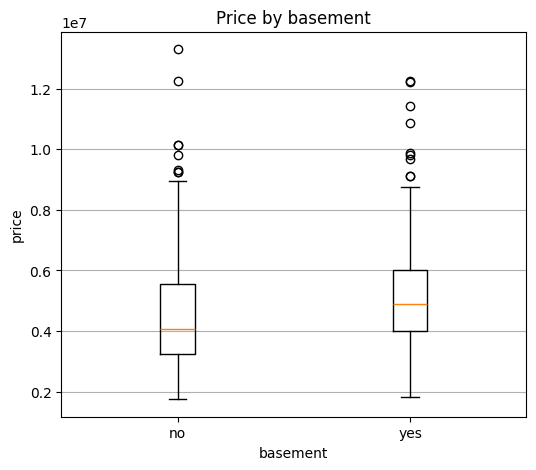

/var/folders/w5/s_933h6s7d1_47_p7bzlg8c80000gn/T/ipykernel_2685/2950906224.py:92: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels)


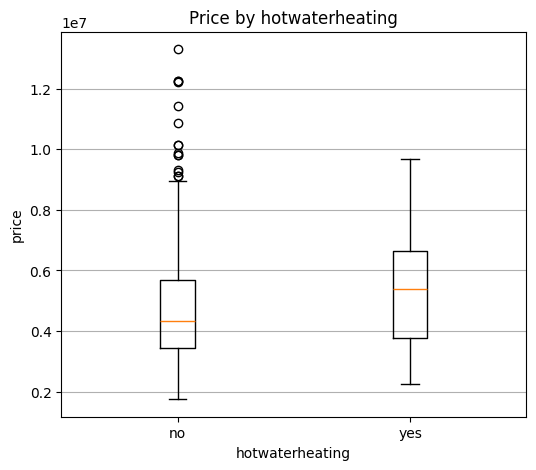

/var/folders/w5/s_933h6s7d1_47_p7bzlg8c80000gn/T/ipykernel_2685/2950906224.py:92: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels)


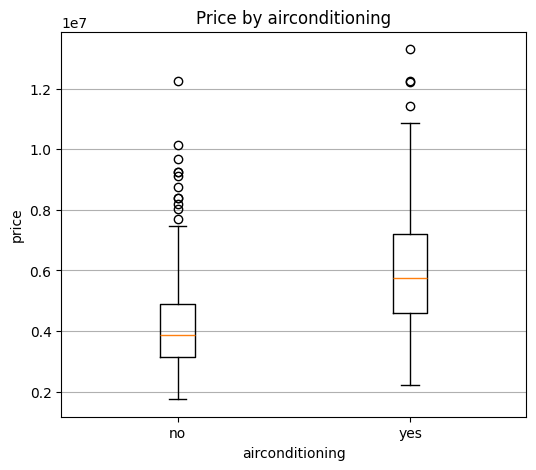

/var/folders/w5/s_933h6s7d1_47_p7bzlg8c80000gn/T/ipykernel_2685/2950906224.py:92: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels)


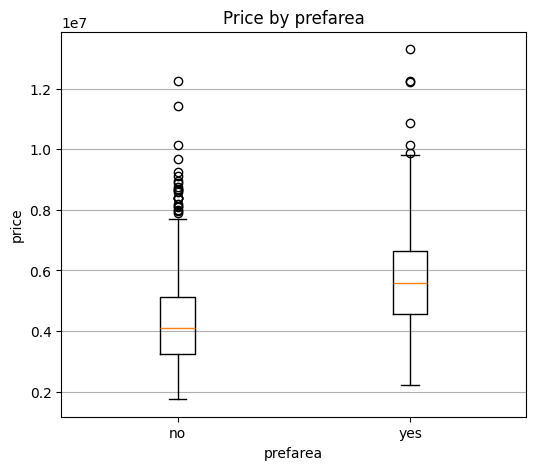

/var/folders/w5/s_933h6s7d1_47_p7bzlg8c80000gn/T/ipykernel_2685/2950906224.py:104: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=order)


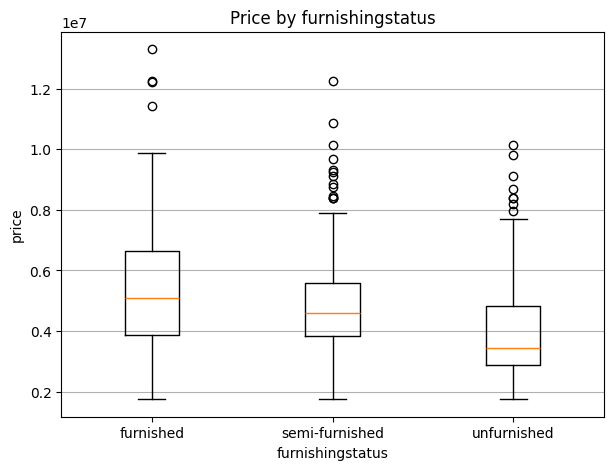


Median price by mainroad:


mainroad
yes    4550000.0
no     3290000.0
Name: price, dtype: float64


Median price by guestroom:


guestroom
yes    5495000.0
no     4165000.0
Name: price, dtype: float64


Median price by basement:


basement
yes    4900000.0
no     4077500.0
Name: price, dtype: float64


Median price by hotwaterheating:


hotwaterheating
yes    5383000.0
no     4329500.0
Name: price, dtype: float64


Median price by airconditioning:


airconditioning
yes    5757500.0
no     3885000.0
Name: price, dtype: float64


Median price by prefarea:


prefarea
yes    5582500.0
no     4095000.0
Name: price, dtype: float64


Median price by furnishingstatus:


furnishingstatus
furnished         5075000.0
semi-furnished    4585000.0
unfurnished       3430000.0
Name: price, dtype: float64

In [26]:
# =========================
# Target distribution: price
# =========================
plt.figure(figsize=(8,5))
plt.hist(df["price"], bins=30)
plt.title("Distribution of Price")
plt.xlabel("price")
plt.ylabel("count")
plt.grid(True)
plt.show()

# =========================
# Numeric relationships with price
# =========================
numeric_cols = ["area", "bedrooms", "bathrooms", "stories", "parking"]

for col in numeric_cols:
    plt.figure(figsize=(7,5))
    plt.scatter(df[col], df["price"], alpha=0.7)
    plt.title(f"Price vs {col}")
    plt.xlabel(col)
    plt.ylabel("price")
    plt.grid(True)
    plt.show()

# Correlation (numeric only)
corr = df[["price"] + numeric_cols].corr()
print("\nCorrelation (numeric):")
display(corr)

# Simple correlation heatmap using matplotlib (no seaborn)
plt.figure(figsize=(7,5))

plt.imshow(
    corr,
    cmap="coolwarm",   # renk paleti eklendi
    vmin=-1,
    vmax=1,
    aspect="auto"
)

plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Correlation Matrix (Numeric)")
plt.colorbar()
plt.tight_layout()
plt.show()

# =========================
# High-correlation features with log(price) (|corr| >= 0.50)
# =========================

price_corr = corr["price"].drop("price")
threshold = 0.50

high_corr_features = price_corr[price_corr.abs() >= threshold]

print("High correlation features with price (|corr| >= 0.50):")
display(high_corr_features.sort_values(ascending=False))

# =========================
# Line charts with log(price) + smoothing
# =========================

for feature in high_corr_features.index:
    temp = df[[feature, "price"]].copy()
    temp["log_price"] = np.log(temp["price"])
    temp = temp.sort_values(by=feature)

    # smoothing (rolling mean)
    temp["log_price_smooth"] = temp["log_price"].rolling(window=20).mean()

    plt.figure(figsize=(7,5))
    plt.plot(temp[feature], temp["log_price_smooth"])
    plt.title(f"log(Price) vs {feature} (corr = {price_corr[feature]:.2f})")
    plt.xlabel(feature)
    plt.ylabel("log(price)")
    plt.grid(True)
    plt.show()

# =========================
# Categorical vs price (boxplots)
# =========================
cat_cols_binary = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
cat_cols_multi = ["furnishingstatus"]

# Binary categories: yes/no
for col in cat_cols_binary:
    plt.figure(figsize=(6,5))
    groups = [df.loc[df[col] == g, "price"].dropna() for g in sorted(df[col].dropna().unique())]
    labels = sorted(df[col].dropna().unique())
    plt.boxplot(groups, labels=labels)
    plt.title(f"Price by {col}")
    plt.xlabel(col)
    plt.ylabel("price")
    plt.grid(True, axis="y")
    plt.show()

# Multi-category: furnishingstatus
for col in cat_cols_multi:
    plt.figure(figsize=(7,5))
    order = df[col].dropna().unique().tolist()
    groups = [df.loc[df[col] == g, "price"].dropna() for g in order]
    plt.boxplot(groups, labels=order)
    plt.title(f"Price by {col}")
    plt.xlabel(col)
    plt.ylabel("price")
    plt.grid(True, axis="y")
    plt.show()

# =========================
# Optional: quick summary table (median price by category)
# =========================
for col in cat_cols_binary + cat_cols_multi:
    print(f"\nMedian price by {col}:")
    display(df.groupby(col)["price"].median().sort_values(ascending=False))

In [34]:
# Numeric (continuous / discrete numeric)
numeric_features = [
    "area",
    "bedrooms",
    "bathrooms",
    "stories",
    "parking"
]

# Categorical (true categorical)
categorical_features = [
    "mainroad",
    "guestroom",
    "basement",
    "hotwaterheating",
    "airconditioning",
    "prefarea",
    "furnishingstatus"
]

X = df[numeric_features + categorical_features]

# Numeric → scaling
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Categorical → one-hot encoding
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

# Column-wise preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

preprocessor.fit(X_train)

num_features_out = numeric_features
cat_features_out = preprocessor.named_transformers_["cat"] \
    .named_steps["onehot"] \
    .get_feature_names_out(categorical_features)

feature_names = np.concatenate([num_features_out, cat_features_out])

print("Total number of features after encoding:", len(feature_names))
print("First 15 features:", feature_names[:15])
# =========================
# Print feature groups (for clarity & documentation)
# =========================

print("\n=== FEATURE GROUPS ===")

print("\nNumeric features (scaled):")
for f in numeric_features:
    print(" -", f)

print("\nCategorical features (one-hot encoded):")
for f in categorical_features:
    print(" -", f)

print("\n=== FEATURES AFTER ENCODING ===")
print(f"Total number of features after preprocessing: {len(feature_names)}")

print("\nNumeric features after preprocessing:")
for f in num_features_out:
    print(" -", f)

print("\nCategorical dummy features (first 15 shown):")
for f in cat_features_out[:15]:
    print(" -", f)

Train shape: (436, 12)
Test shape : (109, 12)
Total number of features after encoding: 13
First 15 features: ['area' 'bedrooms' 'bathrooms' 'stories' 'parking' 'mainroad_yes'
 'guestroom_yes' 'basement_yes' 'hotwaterheating_yes'
 'airconditioning_yes' 'prefarea_yes' 'furnishingstatus_semi-furnished'
 'furnishingstatus_unfurnished']

=== FEATURE GROUPS ===

Numeric features (scaled):
 - area
 - bedrooms
 - bathrooms
 - stories
 - parking

Categorical features (one-hot encoded):
 - mainroad
 - guestroom
 - basement
 - hotwaterheating
 - airconditioning
 - prefarea
 - furnishingstatus

=== FEATURES AFTER ENCODING ===
Total number of features after preprocessing: 13

Numeric features after preprocessing:
 - area
 - bedrooms
 - bathrooms
 - stories
 - parking

Categorical dummy features (first 15 shown):
 - mainroad_yes
 - guestroom_yes
 - basement_yes
 - hotwaterheating_yes
 - airconditioning_yes
 - prefarea_yes
 - furnishingstatus_semi-furnished
 - furnishingstatus_unfurnished


,assumption,model,R2,RMSE,MAE
0,Numeric,Linear Regression,0.652924,1.324507e+06,970043.40392


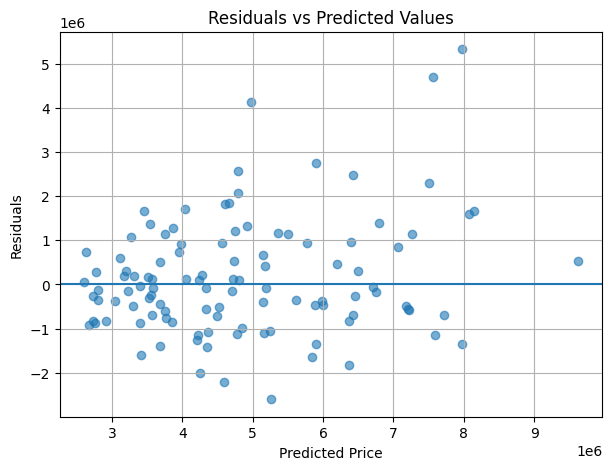

,feature,coefficient,abs_coefficient
9,airconditioning_yes,791426.735843,791426.735843
8,hotwaterheating_yes,684649.885339,684649.885339
10,prefarea_yes,629890.565313,629890.565313
2,bathrooms,521879.027748,521879.027748
0,area,519552.416340,519552.416340
12,furnishingstatus_unfurnished,-413645.062228,413645.062228
7,basement_yes,390251.176181,390251.176181
5,mainroad_yes,367919.947680,367919.947680
3,stories,349251.438906,349251.438906
6,guestroom_yes,231610.037176,231610.037176


In [68]:
# -------------------------
# Pipeline: Preprocess + Linear Regression
# -------------------------
linear_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])

# -------------------------
# Model training
# -------------------------
linear_pipe.fit(X_train, y_train)

# -------------------------
# Prediction
# -------------------------
y_pred = linear_pipe.predict(X_test)

# -------------------------
# Evaluation
# -------------------------
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

results_linear = pd.DataFrame({
    "assumption": ["Numeric"],
    "model": ["Linear Regression"],
    "R2": [r2],
    "RMSE": [rmse],
    "MAE": [mae]
})

display(results_linear)


# =========================
# Residuals vs Predicted
# =========================

residuals = y_test - y_pred

plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.grid(True)
plt.show()

# =========================
# Extract coefficients from trained linear model
# =========================

# Trained model
model = linear_pipe.named_steps["model"]

# Create coefficient DataFrame
coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": model.coef_
})

# Sort by absolute effect
coef_df["abs_coefficient"] = coef_df["coefficient"].abs()
coef_df = coef_df.sort_values("abs_coefficient", ascending=False)

display(coef_df.head(15))

In [58]:
# Model B. Comparison between numeric and categoric features.

numeric_features_B = ["area"]
categorical_features_B = [
    "mainroad",
    "guestroom",
    "basement",
    "hotwaterheating",
    "airconditioning",
    "prefarea",
    "furnishingstatus",
    "bedrooms",
    "bathrooms",
    "stories",
    "parking"
]

X_B = df[numeric_features_B + categorical_features_B]

numeric_transformer_B = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer_B = Pipeline(steps=[
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocessor_B = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_B, numeric_features_B),
        ("cat", categorical_transformer_B, categorical_features_B)
    ]
)

X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(
    X_B,
    y,
    test_size=0.2,
    random_state=42
)

print("Train shape:", X_train_B.shape)
print("Test shape :", X_test_B.shape)

preprocessor_B.fit(X_train_B)

num_features_out_B = numeric_features_B
cat_features_out_B = preprocessor_B.named_transformers_["cat"] \
    .named_steps["onehot"] \
    .get_feature_names_out(categorical_features_B)

feature_names_B = np.concatenate([num_features_out_B, cat_features_out_B])

print("Total number of features after encoding:", len(feature_names_B))
print("First 20 features:", feature_names_B[:20])

preprocessor_B.fit(X_train_B)

num_features_out_B = numeric_features_B
cat_features_out_B = preprocessor_B.named_transformers_["cat"] \
    .named_steps["onehot"] \
    .get_feature_names_out(categorical_features_B)

feature_names_B = np.concatenate([num_features_out_B, cat_features_out_B])

print("Total number of features after encoding:", len(feature_names_B))
print("First 20 features:", feature_names_B[:20])

Train shape: (436, 12)
Test shape : (109, 12)
Total number of features after encoding: 23
First 20 features: ['area' 'mainroad_yes' 'guestroom_yes' 'basement_yes'
 'hotwaterheating_yes' 'airconditioning_yes' 'prefarea_yes'
 'furnishingstatus_semi-furnished' 'furnishingstatus_unfurnished'
 'bedrooms_2' 'bedrooms_3' 'bedrooms_4' 'bedrooms_5' 'bedrooms_6'
 'bathrooms_2' 'bathrooms_3' 'bathrooms_4' 'stories_2' 'stories_3'
 'stories_4']
Total number of features after encoding: 23
First 20 features: ['area' 'mainroad_yes' 'guestroom_yes' 'basement_yes'
 'hotwaterheating_yes' 'airconditioning_yes' 'prefarea_yes'
 'furnishingstatus_semi-furnished' 'furnishingstatus_unfurnished'
 'bedrooms_2' 'bedrooms_3' 'bedrooms_4' 'bedrooms_5' 'bedrooms_6'
 'bathrooms_2' 'bathrooms_3' 'bathrooms_4' 'stories_2' 'stories_3'
 'stories_4']


,assumption,model,R2,RMSE,MAE
0,Categorical,Linear Regression,0.650216,1.329665e+06,948916.418494


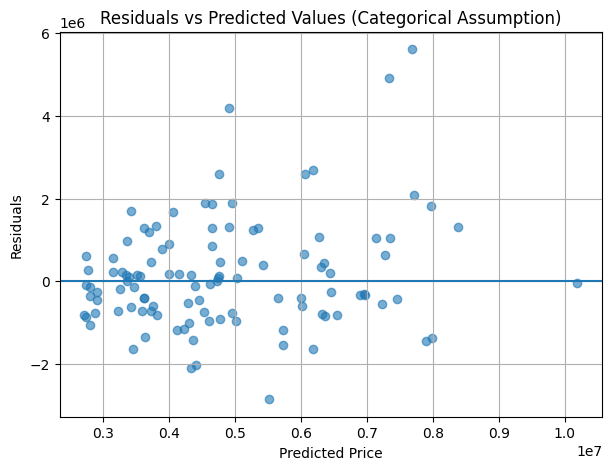

,feature,coefficient,abs_coefficient
0,bathrooms_4,5.204639e+06,5.204639e+06
1,bathrooms_3,2.528090e+06,2.528090e+06
2,stories_4,1.388502e+06,1.388502e+06
3,bedrooms_6,9.755275e+05,9.755275e+05
4,bathrooms_2,9.650879e+05,9.650879e+05
5,airconditioning_yes,7.764095e+05,7.764095e+05
6,hotwaterheating_yes,7.178916e+05,7.178916e+05
7,prefarea_yes,6.474127e+05,6.474127e+05
8,stories_3,6.025188e+05,6.025188e+05
9,bedrooms_5,5.108017e+05,5.108017e+05


In [66]:
# -------------------------
# Pipeline: Preprocess_B + Linear Regression
# -------------------------
linear_pipe_B = Pipeline(steps=[
    ("preprocess", preprocessor_B),
    ("model", LinearRegression())
])

# -------------------------
# Model training
# -------------------------
linear_pipe_B.fit(X_train_B, y_train_B)

# -------------------------
# Prediction
# -------------------------
y_pred_B = linear_pipe_B.predict(X_test_B)

# -------------------------
# Evaluation
# -------------------------
r2_B = r2_score(y_test_B, y_pred_B)
rmse_B = np.sqrt(mean_squared_error(y_test_B, y_pred_B))
mae_B = mean_absolute_error(y_test_B, y_pred_B)

results_linear_B = pd.DataFrame({
    "assumption": ["Categorical"],
    "model": ["Linear Regression"],
    "R2": [r2_B],
    "RMSE": [rmse_B],
    "MAE": [mae_B]
})

display(results_linear_B)
# Residuals vs Predicted (Model B)
residuals_B = y_test_B - y_pred_B

plt.figure(figsize=(7,5))
plt.scatter(y_pred_B, residuals_B, alpha=0.6)
plt.axhline(0)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (Categorical Assumption)")
plt.grid(True)
plt.show()

# =========================
# Extract coefficients — Model B (Categorical Assumption)
# =========================

# Trained model B
model_B = linear_pipe_B.named_steps["model"]

# Create coefficient DataFrame for Model B
coef_df_B = pd.DataFrame({
    "feature": feature_names_B,
    "coefficient": model_B.coef_
})

# Sort by absolute effect
coef_df_B["abs_coefficient"] = coef_df_B["coefficient"].abs()
coef_df_B = coef_df_B.sort_values("abs_coefficient", ascending=False).reset_index(drop=True)

display(coef_df_B.head(15))

In [72]:

dcd

NameError: name 'dcd' is not defined